In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from io import BytesIO
import requests
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:/Users/Admin/Desktop/Top7.xlsx')
df.head()

,Player,Pos,90s,Per 90 Minutes G-PK,Per 90 Minutes Ast,Per 90 Minutes xAG,Per 90 Minutes npxG,PrgC/90,PrgP/90,PrgR/90,...,TakO/90,Take-Ons Succ%,Def3t/90,Mid3t/90,Att3t/90,Pent/90,TakO/90.1,CarD,1/3Car/90,CpaCar/90
0,Brenden Aaronson,"MF,FW",26.4,0.04,0.11,0.16,0.15,1.6,3.3,5.7,...,3.79,34.0,4.39,18.75,20.98,2.73,3.79,58.03,1.29,0.49
1,Paxten Aaronson,"MF,DF",1.9,0.00,0.00,0.03,0.09,4.2,3.2,7.9,...,3.16,50.0,3.16,21.58,27.89,8.95,3.16,75.26,1.05,1.05
2,James Abankwah,DF,0.7,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,1.43,100.0,37.14,18.57,0.00,0.00,1.43,27.14,0.00,0.00
3,George Abbott,MF,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,...,NaN,0.0,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN
4,Yunis Abdelhamid,DF,37.0,0.03,0.05,0.03,0.06,1.1,5.8,0.3,...,1.00,56.8,29.41,34.46,3.32,1.05,1.00,165.49,0.57,0.08


In [3]:
df['Pos'].unique()

array(['MF,FW', 'MF,DF', 'DF', 'MF', 'FW,MF', 'FW', 'GK', 'DF,FW',
       'DF,MF', 'FW,DF'], dtype=object)

In [4]:
positions = ['MF,FW', 'MF,DF','MF']
df = df[df['Pos'].isin(positions)]
df.head()

,Player,Pos,90s,Per 90 Minutes G-PK,Per 90 Minutes Ast,Per 90 Minutes xAG,Per 90 Minutes npxG,PrgC/90,PrgP/90,PrgR/90,...,TakO/90,Take-Ons Succ%,Def3t/90,Mid3t/90,Att3t/90,Pent/90,TakO/90.1,CarD,1/3Car/90,CpaCar/90
0,Brenden Aaronson,"MF,FW",26.4,0.04,0.11,0.16,0.15,1.6,3.3,5.7,...,3.79,34.0,4.39,18.75,20.98,2.73,3.79,58.03,1.29,0.49
1,Paxten Aaronson,"MF,DF",1.9,0.00,0.00,0.03,0.09,4.2,3.2,7.9,...,3.16,50.0,3.16,21.58,27.89,8.95,3.16,75.26,1.05,1.05
3,George Abbott,MF,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,...,NaN,0.0,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN
5,Himad Abdelli,"MF,FW",23.7,0.08,0.08,0.12,0.06,2.4,6.4,4.7,...,3.21,56.6,10.00,38.57,17.26,0.97,3.21,138.99,2.53,0.30
6,Salis Abdul Samed,MF,32.2,0.03,0.03,0.05,0.03,1.0,5.1,1.4,...,1.52,59.2,12.55,46.65,10.56,0.50,1.52,107.36,1.74,0.09


In [5]:
df = df[df['90s'] >= 10]
df.head()

,Player,Pos,90s,Per 90 Minutes G-PK,Per 90 Minutes Ast,Per 90 Minutes xAG,Per 90 Minutes npxG,PrgC/90,PrgP/90,PrgR/90,...,TakO/90,Take-Ons Succ%,Def3t/90,Mid3t/90,Att3t/90,Pent/90,TakO/90.1,CarD,1/3Car/90,CpaCar/90
0,Brenden Aaronson,"MF,FW",26.4,0.04,0.11,0.16,0.15,1.6,3.3,5.7,...,3.79,34.0,4.39,18.75,20.98,2.73,3.79,58.03,1.29,0.49
5,Himad Abdelli,"MF,FW",23.7,0.08,0.08,0.12,0.06,2.4,6.4,4.7,...,3.21,56.6,10.00,38.57,17.26,0.97,3.21,138.99,2.53,0.30
6,Salis Abdul Samed,MF,32.2,0.03,0.03,0.05,0.03,1.0,5.1,1.4,...,1.52,59.2,12.55,46.65,10.56,0.50,1.52,107.36,1.74,0.09
7,Laurent Abergel,MF,26.0,0.00,0.04,0.05,0.02,0.5,5.5,0.5,...,1.58,56.1,22.35,41.12,5.81,0.15,1.58,99.88,1.12,0.00
19,Tyler Adams,MF,24.0,0.00,0.00,0.06,0.00,0.8,5.7,0.8,...,0.92,31.8,15.67,42.08,10.58,0.21,0.92,64.79,0.88,0.00


In [6]:
df.columns

Index(['Player', 'Pos', '90s', 'Per 90 Minutes G-PK', 'Per 90 Minutes Ast',
       'Per 90 Minutes xAG', 'Per 90 Minutes npxG', 'PrgC/90', 'PrgP/90',
       'PrgR/90', 'Standard Sh/90', 'Standard Dist', 'Total Cmp%',
       'Short Cmp%', 'Medium Cmp%', 'Long Cmp%', 'Short%', 'Medium%', 'Long%',
       'KP/90', 'F3/90', 'PPA/90', 'CrsPA/90', 'Tb/90', 'Sw/90', 'Crs/90',
       'SCA/90', 'GCA/90', 'SCTo/90', 'GCTo/90', 'Challenges Tkl%', 'Chal/90',
       'Tac/90', 'TklW%', 'Tdef3/90', 'Tmid3/90', 'Tatt3/90', 'Blpa/90',
       'Int/90', 'Aerial Duels Won%', 'Duels/90', 'TakO/90', 'Take-Ons Succ%',
       'Def3t/90', 'Mid3t/90', 'Att3t/90', 'Pent/90', 'TakO/90.1', 'CarD',
       '1/3Car/90', 'CpaCar/90'],
      dtype='object')

In [7]:
df = df[['Player', 'Per 90 Minutes G-PK', 'Per 90 Minutes Ast',
       'Per 90 Minutes xAG', 'Per 90 Minutes npxG', 'PrgC/90', 'PrgP/90',
       'PrgR/90', 'Standard Sh/90', 'Standard Dist', 'Total Cmp%',
       'Short Cmp%', 'Medium Cmp%', 'Long Cmp%', 'Short%', 'Medium%', 'Long%',
       'KP/90', 'F3/90', 'PPA/90', 'CrsPA/90', 'Tb/90', 'Sw/90', 'Crs/90',
       'SCA/90', 'GCA/90', 'SCTo/90', 'GCTo/90', 'Challenges Tkl%', 'Chal/90',
       'Tac/90', 'TklW%', 'Tdef3/90', 'Tmid3/90', 'Tatt3/90', 'Blpa/90',
       'Int/90', 'Aerial Duels Won%', 'Duels/90', 'TakO/90', 'Take-Ons Succ%',
       'Def3t/90', 'Mid3t/90', 'Att3t/90', 'Pent/90', 'CarD',
       '1/3Car/90', 'CpaCar/90']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 3796
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               638 non-null    object 
 1   Per 90 Minutes G-PK  638 non-null    float64
 2   Per 90 Minutes Ast   638 non-null    float64
 3   Per 90 Minutes xAG   638 non-null    float64
 4   Per 90 Minutes npxG  638 non-null    float64
 5   PrgC/90              638 non-null    float64
 6   PrgP/90              638 non-null    float64
 7   PrgR/90              638 non-null    float64
 8   Standard Sh/90       638 non-null    float64
 9   Standard Dist        638 non-null    float64
 10  Total Cmp%           638 non-null    float64
 11  Short Cmp%           638 non-null    float64
 12  Medium Cmp%          638 non-null    float64
 13  Long Cmp%            638 non-null    float64
 14  Short%               638 non-null    float64
 15  Medium%              638 non-null    float64

In [8]:
df.isnull().sum()

Player                 0
Per 90 Minutes G-PK    0
Per 90 Minutes Ast     0
Per 90 Minutes xAG     0
Per 90 Minutes npxG    0
PrgC/90                0
PrgP/90                0
PrgR/90                0
Standard Sh/90         0
Standard Dist          0
Total Cmp%             0
Short Cmp%             0
Medium Cmp%            0
Long Cmp%              0
Short%                 0
Medium%                0
Long%                  0
KP/90                  0
F3/90                  0
PPA/90                 0
CrsPA/90               0
Tb/90                  0
Sw/90                  0
Crs/90                 0
SCA/90                 0
GCA/90                 0
SCTo/90                0
GCTo/90                0
Challenges Tkl%        0
Chal/90                0
Tac/90                 0
TklW%                  0
Tdef3/90               0
Tmid3/90               0
Tatt3/90               0
Blpa/90                0
Int/90                 0
Aerial Duels Won%      0
Duels/90               0
TakO/90                0


In [9]:
from sklearn import preprocessing

player_names = df['Player'].tolist()

df = df.drop(['Player'], axis = 1)

x = df.values

scaler = preprocessing.MinMaxScaler()

x_scaled = scaler.fit_transform(x)

X_norm = pd.DataFrame(x_scaled)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

reduced = pd.DataFrame(pca.fit_transform(X_norm))

reduced.head()

,0,1
0,0.631063,-0.514053
1,-0.096550,0.381888
2,-0.619920,0.190942
3,-1.026589,0.278323
4,-0.895306,0.002721


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'WCSS')

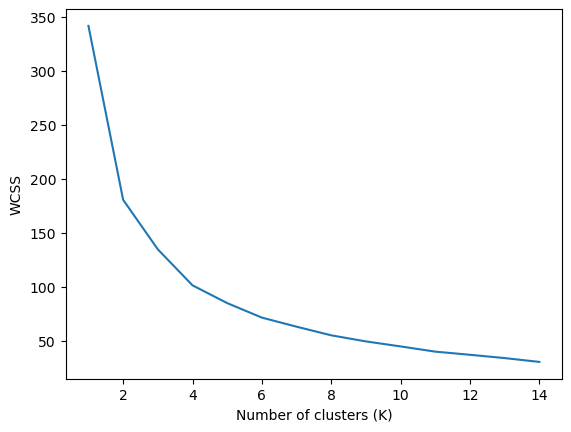

In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 8)
kmeans = kmeans.fit(reduced)

labels = kmeans.predict(reduced)
clusters = kmeans.labels_.tolist()

In [13]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,0.631063,-0.514053,3,Brenden Aaronson
1,-0.096550,0.381888,4,Himad Abdelli
2,-0.619920,0.190942,2,Salis Abdul Samed
3,-1.026589,0.278323,2,Laurent Abergel
4,-0.895306,0.002721,2,Tyler Adams


In [14]:
selected_rows = reduced.loc[reduced['cluster'] == 0]['name']
selected_rows.head(40)


7              Kevin Agudelo
28             Tolgay Arslan
34        Filippo Bandinelli
38           Mickaël Barreto
39            Simone Bastoni
52      Leonardo Bittencourt
60            Mehdi Bourabia
72              Jens Cajuste
78          Pierrick Capelle
79            Étienne Capoue
87              Franco Cervi
92             Ryan Christie
95            Santi Comesaña
109         Brecht Dejaegere
111           Kerem Demirbay
113    Kiernan Dewsbury-Hall
120        Nicolás Domínguez
124              Désiré Doué
125           Kamory Doumbia
128            Alfred Duncan
136              Wataru Endo
137              Arne Engels
139       Salvatore Esposito
140             Edu Expósito
143           Nicolò Fagioli
148           Álex Fernández
156          Davide Frattesi
157                     Fred
160          Conor Gallagher
165                     Gavi
174            Leon Goretzka
196           Liam Henderson
197         Matheus Henrique
207               Alex Iwobi
210           

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2000x1000 with 0 Axes>

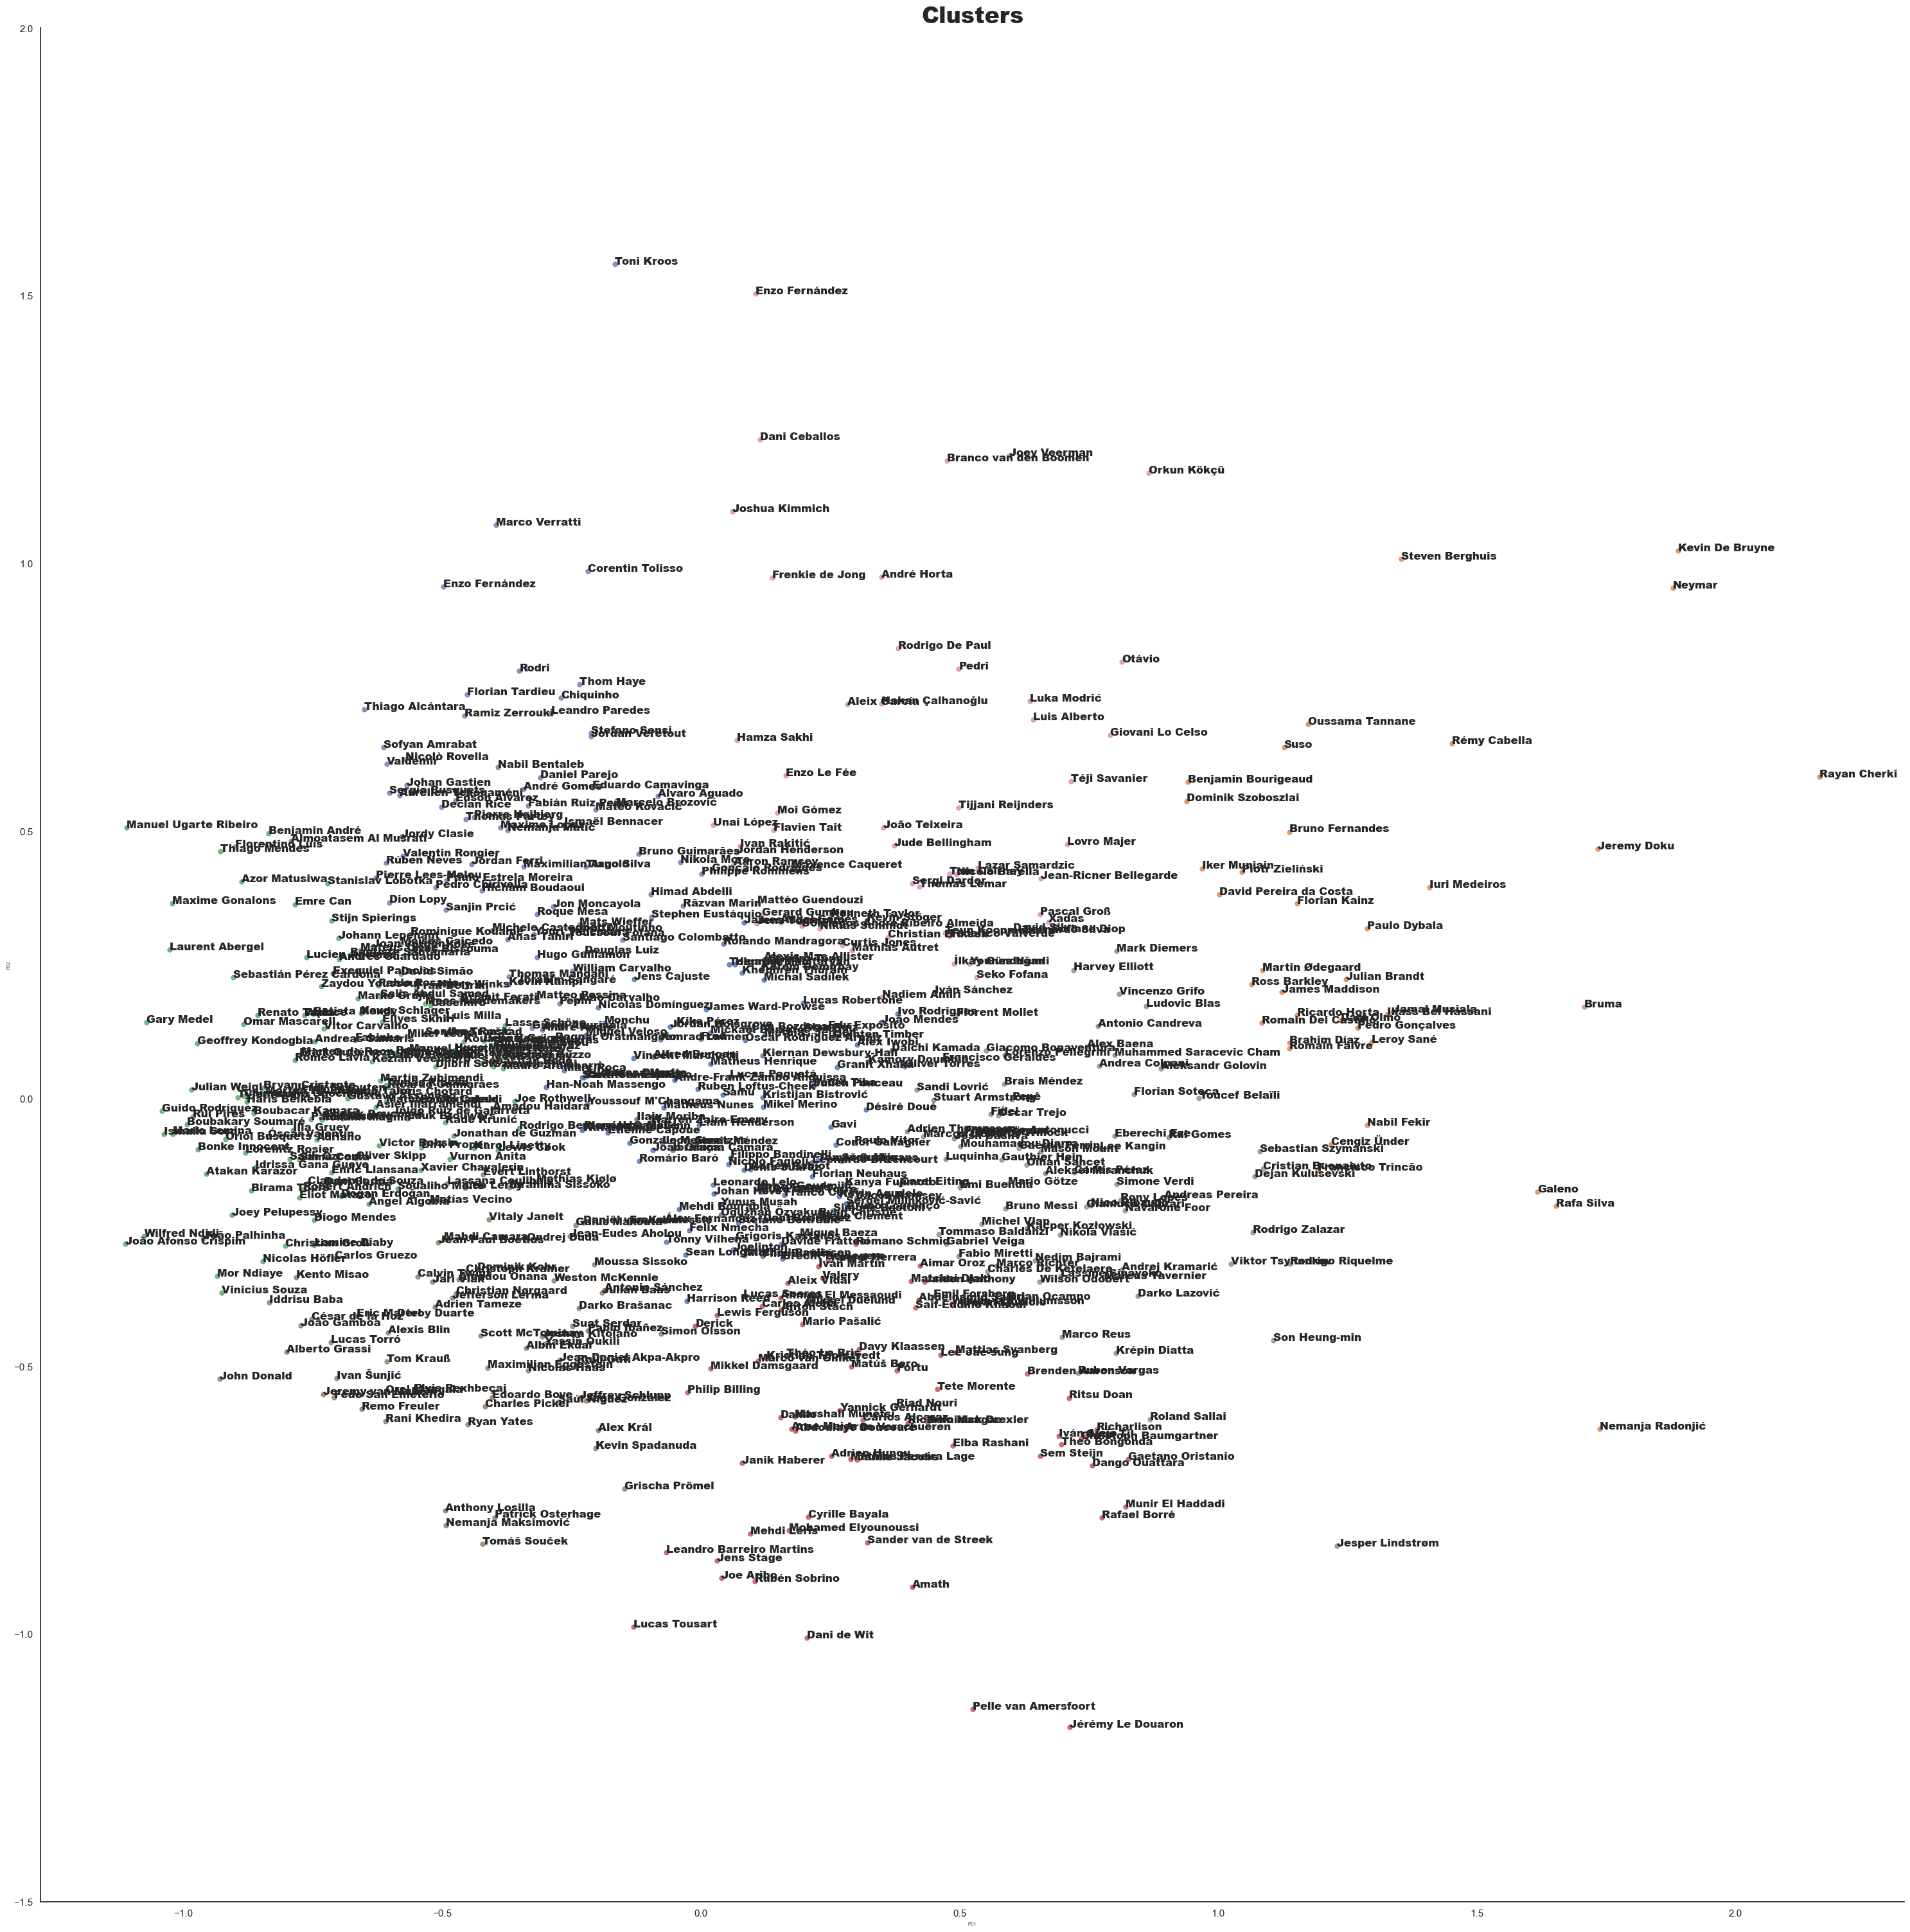

<Figure size 2000x1000 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='white')

ax = sns.lmplot(x = 'x', y = 'y', hue = 'cluster', data = reduced, legend =False, fit_reg=False, size = 30, scatter_kws={'s':25})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s, fontweight = 'heavy'))
    
ax.set(ylim=(-1.5,2))
plt.tick_params(size=5)
plt.xlabel('PC1', fontsize =5)
plt.ylabel('PC2', fontsize =5)
plt.title('Clusters', size=25,weight = 'heavy')
plt.figure(figsize=(20, 10))

In [16]:
reduced1 = reduced

In [17]:
cluster_list = [0, 1, 2, 3, 4, 5, 6, 7]
reduced = reduced1[reduced1['cluster'].isin(cluster_list)]

dist_matrix = pd.DataFrame(index=reduced['name'], columns=reduced1['name'])

for i in range(len(dist_matrix)):
    x_i = reduced.iloc[i, 0]
    y_i = reduced.iloc[i, 1]
    for j in range(len(dist_matrix)):
        x_j = reduced.iloc[j, 0]
        y_j = reduced.iloc[j, 1]
        dist_matrix.iloc[i, j] = ((((x_i - x_j) ** 2) + ((y_i - y_j) ** 2)) ** (0.5))
        
max_euc_dist = list(dist_matrix.max())

sim_matrix = pd.DataFrame(index=reduced['name'], columns=reduced['name'])

for i in range(len(dist_matrix)):
    for j in range(len(dist_matrix)):
        sim_matrix.iloc[i, j] = ((max_euc_dist[i] - dist_matrix.iloc[i, j]) * 100 / max_euc_dist[i])


In [18]:
player_comprasion = str(input('Player name: '))
column = str(player_comprasion)

sim_player_top10 = sim_matrix[column].reset_index().sort_values(by=column,ascending=False)
sim_player_top10 = pd.merge(sim_player_top10,reduced1[['name','cluster']],
                            on='name', how='outer').rename(columns={column: column+ ' - Similiraty %','name':'Player name'}).head(21)
sim_player_top10 = sim_player_top10[sim_player_top10['Player name']!=column]
sim_player_top10

Player name: Jude Bellingham


,Player name,Jude Bellingham - Similiraty %,cluster
1,João Teixeira,97.804228,6
2,Sergi Darder,95.554298,6
3,Thomas Lemar,94.851801,6
4,Tom Cairney,93.189643,6
5,Nicolò Barella,92.466941,6
6,Tijjani Reijnders,92.082326,6
7,Kevin Stöger,91.999462,6
8,Lazar Samardzic,90.729927,6
9,Kenneth Taylor,90.666282,6
10,Christian Eriksen,90.60203,6


In [28]:
df = pd.read_excel('C:/Users/Admin/Desktop/Top7.xlsx')
df.head()

,Player,Pos,90s,Per 90 Minutes G-PK,Per 90 Minutes Ast,Per 90 Minutes xAG,Per 90 Minutes npxG,PrgC/90,PrgP/90,PrgR/90,...,TakO/90,Take-Ons Succ%,Def3t/90,Mid3t/90,Att3t/90,Pent/90,TakO/90.1,CarD,1/3Car/90,CpaCar/90
0,Brenden Aaronson,"MF,FW",26.4,0.04,0.11,0.16,0.15,1.6,3.3,5.7,...,3.79,34.0,4.39,18.75,20.98,2.73,3.79,58.03,1.29,0.49
1,Paxten Aaronson,"MF,DF",1.9,0.00,0.00,0.03,0.09,4.2,3.2,7.9,...,3.16,50.0,3.16,21.58,27.89,8.95,3.16,75.26,1.05,1.05
2,James Abankwah,DF,0.7,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,1.43,100.0,37.14,18.57,0.00,0.00,1.43,27.14,0.00,0.00
3,George Abbott,MF,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,...,NaN,0.0,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN
4,Yunis Abdelhamid,DF,37.0,0.03,0.05,0.03,0.06,1.1,5.8,0.3,...,1.00,56.8,29.41,34.46,3.32,1.05,1.00,165.49,0.57,0.08


In [29]:
JB_replacement = ['Jude Bellingham','Tijjani Reijnders','Lazar Samardzic','Kenneth Taylor','Maxence Caqueret','Enzo Le Fée','Felix Nmecha','Marcel Sabitzer']
df = df[df['Player'].isin(JB_replacement)]
df.head(8)

,Player,Pos,90s,Per 90 Minutes G-PK,Per 90 Minutes Ast,Per 90 Minutes xAG,Per 90 Minutes npxG,PrgC/90,PrgP/90,PrgR/90,...,TakO/90,Take-Ons Succ%,Def3t/90,Mid3t/90,Att3t/90,Pent/90,TakO/90.1,CarD,1/3Car/90,CpaCar/90
261,Jude Bellingham,MF,29.9,0.23,0.13,0.14,0.25,3.2,8.4,4.6,...,5.050000,57.0,11.44,39.16,20.27,3.51,5.050000,130.84,1.67,0.80
439,Maxence Caqueret,MF,30.7,0.13,0.23,0.16,0.09,1.5,6.0,3.7,...,2.830000,47.1,10.85,38.96,21.30,2.38,2.830000,113.42,2.64,0.36
1411,Enzo Le Fée,MF,33.6,0.15,0.18,0.20,0.11,2.9,6.5,3.1,...,4.610000,43.9,16.61,42.32,20.09,1.04,4.610000,161.10,2.68,0.39
1822,Felix Nmecha,MF,20.4,0.15,0.25,0.16,0.13,1.1,4.2,2.6,...,2.250000,56.5,8.97,26.27,12.65,1.96,2.250000,60.54,1.08,0.10
2188,Marcel Sabitzer,MF,7.0,0.00,0.14,0.13,0.11,1.1,5.4,3.7,...,0.430000,33.3,9.86,28.57,15.71,2.86,0.430000,51.57,0.86,0.00
2210,Lazar Samardzic,MF,20.5,0.24,0.19,0.18,0.12,1.7,4.9,3.2,...,3.120000,43.8,7.80,27.90,18.59,1.85,3.120000,76.49,1.61,0.34
3086,Tijjani Reijnders,MF,33.8,0.09,0.18,0.21,0.17,3.0,7.6,2.7,...,2.721893,55.4,11.63,35.47,23.99,2.13,2.721893,132.43,2.72,0.77
3154,Kenneth Taylor,MF,27.7,0.29,0.11,0.11,0.15,2.3,8.6,4.3,...,1.913357,50.9,11.41,43.54,25.09,2.85,1.913357,132.38,1.95,0.69


In [30]:
df.columns

Index(['Player', 'Pos', '90s', 'Per 90 Minutes G-PK', 'Per 90 Minutes Ast',
       'Per 90 Minutes xAG', 'Per 90 Minutes npxG', 'PrgC/90', 'PrgP/90',
       'PrgR/90', 'Standard Sh/90', 'Standard Dist', 'Total Cmp%',
       'Short Cmp%', 'Medium Cmp%', 'Long Cmp%', 'Short%', 'Medium%', 'Long%',
       'KP/90', 'F3/90', 'PPA/90', 'CrsPA/90', 'Tb/90', 'Sw/90', 'Crs/90',
       'SCA/90', 'GCA/90', 'SCTo/90', 'GCTo/90', 'Challenges Tkl%', 'Chal/90',
       'Tac/90', 'TklW%', 'Tdef3/90', 'Tmid3/90', 'Tatt3/90', 'Blpa/90',
       'Int/90', 'Aerial Duels Won%', 'Duels/90', 'TakO/90', 'Take-Ons Succ%',
       'Def3t/90', 'Mid3t/90', 'Att3t/90', 'Pent/90', 'TakO/90.1', 'CarD',
       '1/3Car/90', 'CpaCar/90'],
      dtype='object')

In [31]:
df.set_index('Player', inplace = True)
df = df[['Per 90 Minutes xAG', 'Per 90 Minutes npxG', 'PrgC/90', 'PrgP/90', 'PrgR/90', 'Total Cmp%', 'KP/90', 'PPA/90', 'SCA/90', 'GCA/90', 'Tac/90', 'TklW%','Int/90']]
df.head(8)

,Per 90 Minutes xAG,Per 90 Minutes npxG,PrgC/90,PrgP/90,PrgR/90,Total Cmp%,KP/90,PPA/90,SCA/90,GCA/90,Tac/90,TklW%,Int/90
Player,,,,,,,,,,,,,
Jude Bellingham,0.14,0.25,3.2,8.4,4.6,81.7,1.14,1.51,4.18,0.57,2.54,0.55,1.17
Maxence Caqueret,0.16,0.09,1.5,6.0,3.7,82.9,1.95,0.94,3.84,0.49,2.83,0.62,1.27
Enzo Le Fée,0.20,0.11,2.9,6.5,3.1,80.6,1.99,1.10,3.57,0.33,3.21,0.59,1.01
Felix Nmecha,0.16,0.13,1.1,4.2,2.6,75.6,0.98,0.54,2.45,0.34,2.01,0.59,1.23
Marcel Sabitzer,0.13,0.11,1.1,5.4,3.7,77.2,1.43,1.00,2.87,0.43,1.71,0.67,1.14
Lazar Samardzic,0.18,0.12,1.7,4.9,3.2,80.1,2.34,1.02,4.77,0.49,1.61,0.48,0.54
Tijjani Reijnders,0.21,0.17,3.0,7.6,2.7,86.6,1.83,2.10,4.61,0.53,1.07,0.58,1.57
Kenneth Taylor,0.11,0.15,2.3,8.6,4.3,87.4,0.83,2.17,2.60,0.32,1.88,0.50,0.79


In [32]:
df.columns

Index(['Per 90 Minutes xAG', 'Per 90 Minutes npxG', 'PrgC/90', 'PrgP/90',
       'PrgR/90', 'Total Cmp%', 'KP/90', 'PPA/90', 'SCA/90', 'GCA/90',
       'Tac/90', 'TklW%', 'Int/90'],
      dtype='object')

In [33]:
from soccerplots.radar_chart import Radar

In [34]:
df1 = df[['Per 90 Minutes xAG', 'Per 90 Minutes npxG', 'PrgC/90', 'PrgP/90', 'PrgR/90', 'Total Cmp%', 'KP/90', 'PPA/90', 'SCA/90', 'GCA/90', 'Tac/90', 'TklW%','Int/90']].agg(['min', 'max'])
df1.head()

,Per 90 Minutes xAG,Per 90 Minutes npxG,PrgC/90,PrgP/90,PrgR/90,Total Cmp%,KP/90,PPA/90,SCA/90,GCA/90,Tac/90,TklW%,Int/90
min,0.11,0.09,1.1,4.2,2.6,75.6,0.83,0.54,2.45,0.32,1.07,0.48,0.54
max,0.21,0.25,3.2,8.6,4.6,87.4,2.34,2.17,4.77,0.57,3.21,0.67,1.57


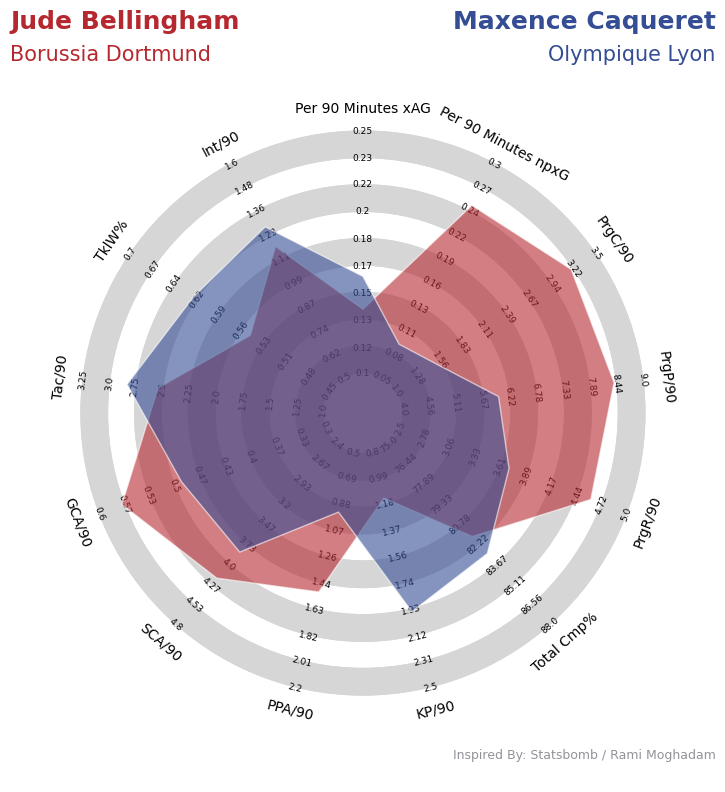

In [35]:
params = df.columns.tolist()

ranges = [(0.10,0.25),(0.05,0.30),(1.0,3.5),(4.0,9.0),(2.5,5.0),(75.0,88.0),(0.80,2.50),(0.50,2.20),(2.40,4.80),(0.30,0.60),(1.0,3.25),(0.45,0.70),(0.5,1.60)]


values = df.iloc[0], df.iloc[1] 

## title
title = dict(
    title_name='Jude Bellingham',
    title_color='#B6282F',
    subtitle_name='Borussia Dortmund',
    subtitle_color='#B6282F',
    title_name_2='Maxence Caqueret',
    title_color_2='#344D94',
    subtitle_name_2='Olympique Lyon',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)


radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, compare=True)

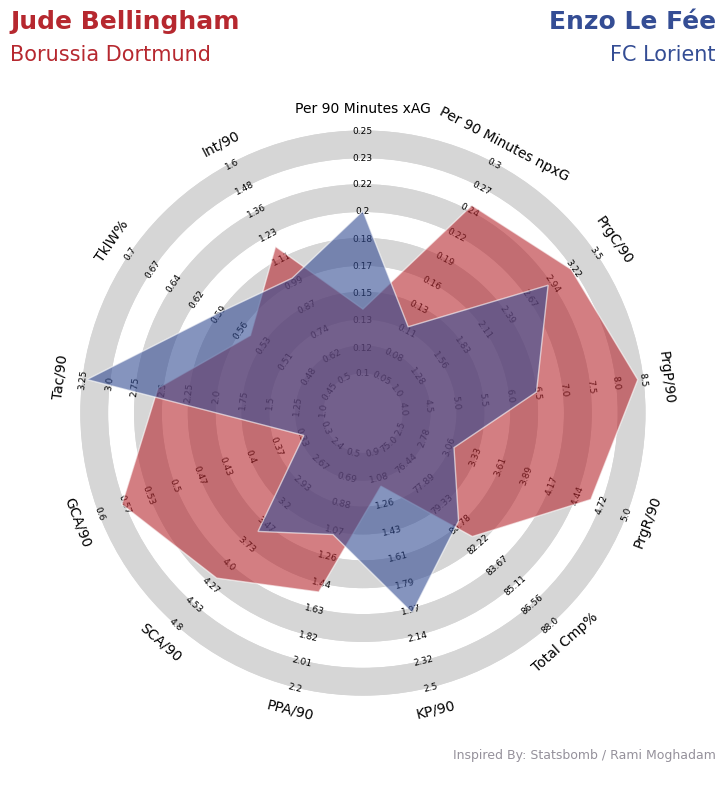

In [36]:
params = df.columns.tolist()

ranges = [(0.10,0.25),(0.05,0.30),(1.0,3.5),(4.0,8.5),(2.5,5.0),(75.0,88.0),(0.90,2.50),(0.50,2.20),(2.40,4.80),(0.30,0.60),(1.0,3.25),(0.45,0.70),(0.5,1.60)]


values = df.iloc[0], df.iloc[2] 

## title
title = dict(
    title_name='Jude Bellingham',
    title_color='#B6282F',
    subtitle_name='Borussia Dortmund',
    subtitle_color='#B6282F',
    title_name_2='Enzo Le Fée',
    title_color_2='#344D94',
    subtitle_name_2='FC Lorient',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)


radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, compare=True)

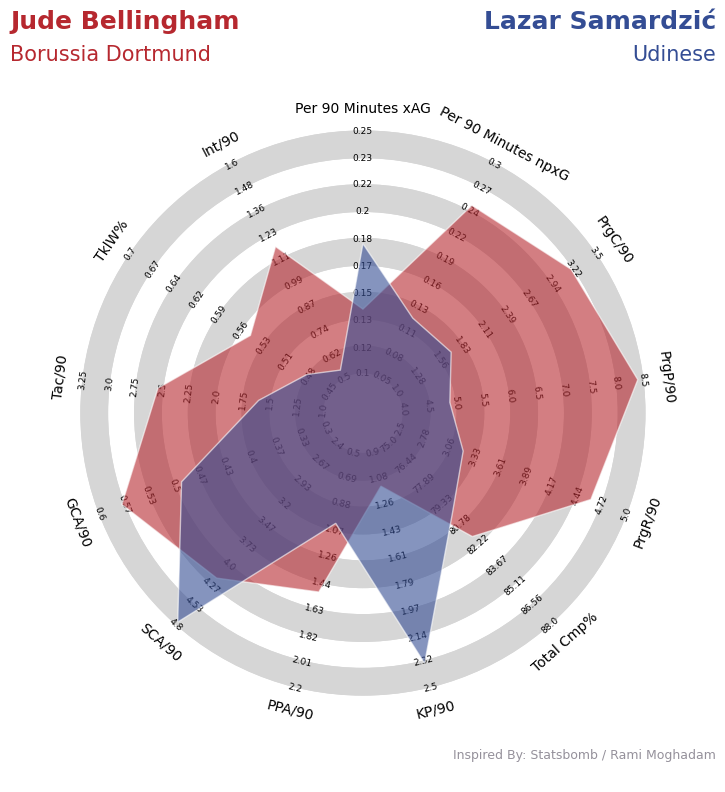

In [37]:
params = df.columns.tolist()

ranges = [(0.10,0.25),(0.05,0.30),(1.0,3.5),(4.0,8.5),(2.5,5.0),(75.0,88.0),(0.90,2.50),(0.50,2.20),(2.40,4.80),(0.30,0.60),(1.0,3.25),(0.45,0.70),(0.5,1.60)]


values = df.iloc[0], df.iloc[5] 

## title
title = dict(
    title_name='Jude Bellingham',
    title_color='#B6282F',
    subtitle_name='Borussia Dortmund',
    subtitle_color='#B6282F',
    title_name_2='Lazar Samardzić',
    title_color_2='#344D94',
    subtitle_name_2='Udinese',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)


radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, compare=True)

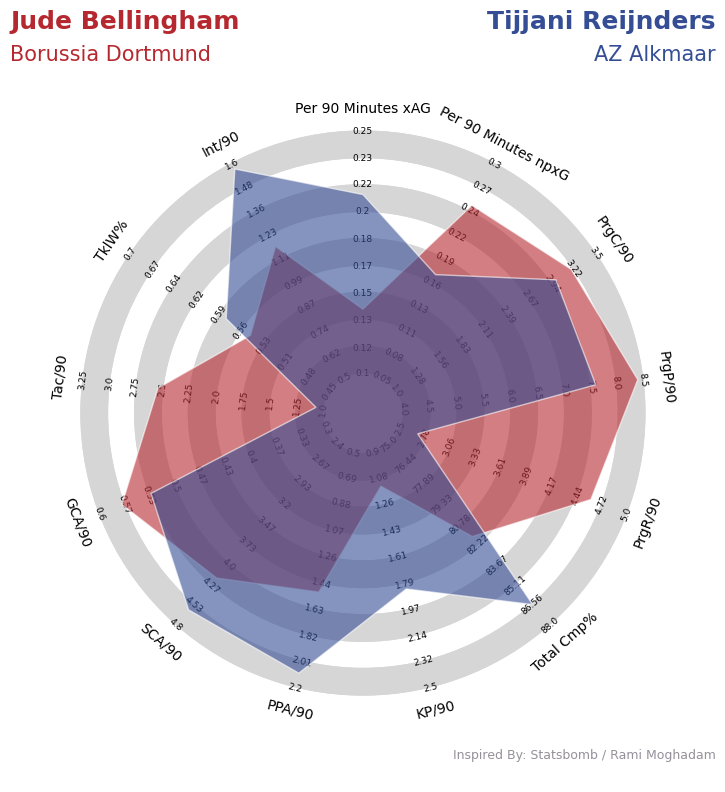

In [38]:
params = df.columns.tolist()

ranges = [(0.10,0.25),(0.05,0.30),(1.0,3.5),(4.0,8.5),(2.5,5.0),(75.0,88.0),(0.90,2.50),(0.50,2.20),(2.40,4.80),(0.30,0.60),(1.0,3.25),(0.45,0.70),(0.5,1.60)]


values = df.iloc[0], df.iloc[6] 

## title
title = dict(
    title_name='Jude Bellingham',
    title_color='#B6282F',
    subtitle_name='Borussia Dortmund',
    subtitle_color='#B6282F',
    title_name_2='Tijjani Reijnders',
    title_color_2='#344D94',
    subtitle_name_2='AZ Alkmaar',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)


radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, compare=True)

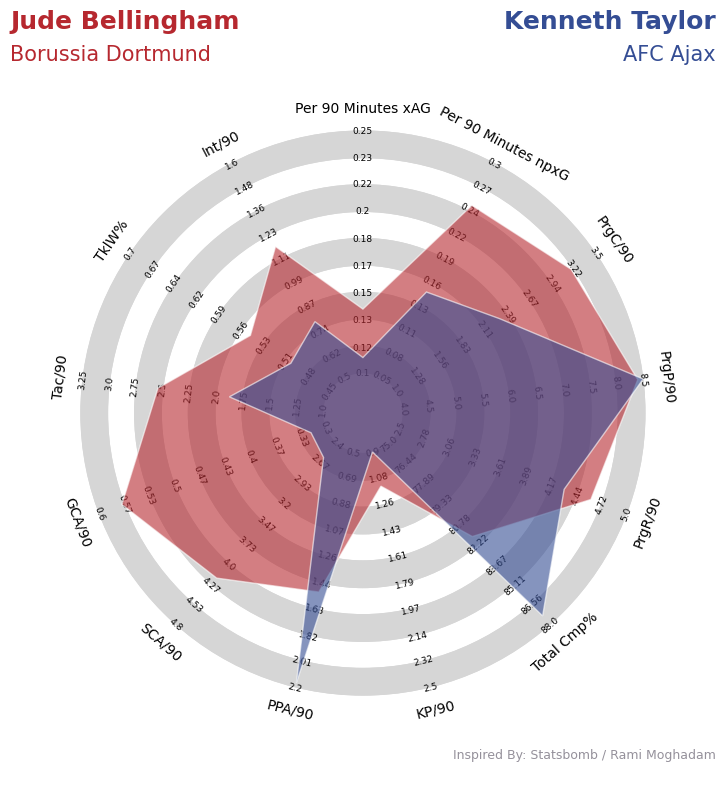

In [39]:
params = df.columns.tolist()

ranges = [(0.10,0.25),(0.05,0.30),(1.0,3.5),(4.0,8.5),(2.5,5.0),(75.0,88.0),(0.90,2.50),(0.50,2.20),(2.40,4.80),(0.30,0.60),(1.0,3.25),(0.45,0.70),(0.5,1.60)]


values = df.iloc[0], df.iloc[7] 

## title
title = dict(
    title_name='Jude Bellingham',
    title_color='#B6282F',
    subtitle_name='Borussia Dortmund',
    subtitle_color='#B6282F',
    title_name_2='Kenneth Taylor',
    title_color_2='#344D94',
    subtitle_name_2='AFC Ajax',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)


radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, compare=True)

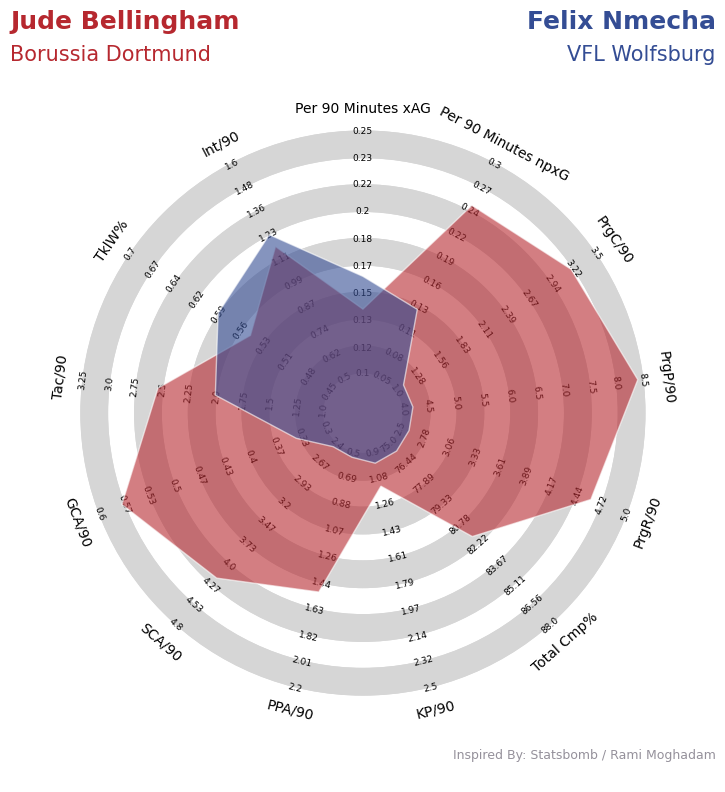

In [40]:
params = df.columns.tolist()

ranges = [(0.10,0.25),(0.05,0.30),(1.0,3.5),(4.0,8.5),(2.5,5.0),(75.0,88.0),(0.90,2.50),(0.50,2.20),(2.40,4.80),(0.30,0.60),(1.0,3.25),(0.45,0.70),(0.5,1.60)]


values = df.iloc[0], df.iloc[3] 

## title
title = dict(
    title_name='Jude Bellingham',
    title_color='#B6282F',
    subtitle_name='Borussia Dortmund',
    subtitle_color='#B6282F',
    title_name_2='Felix Nmecha',
    title_color_2='#344D94',
    subtitle_name_2='VFL Wolfsburg',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)


radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, compare=True)

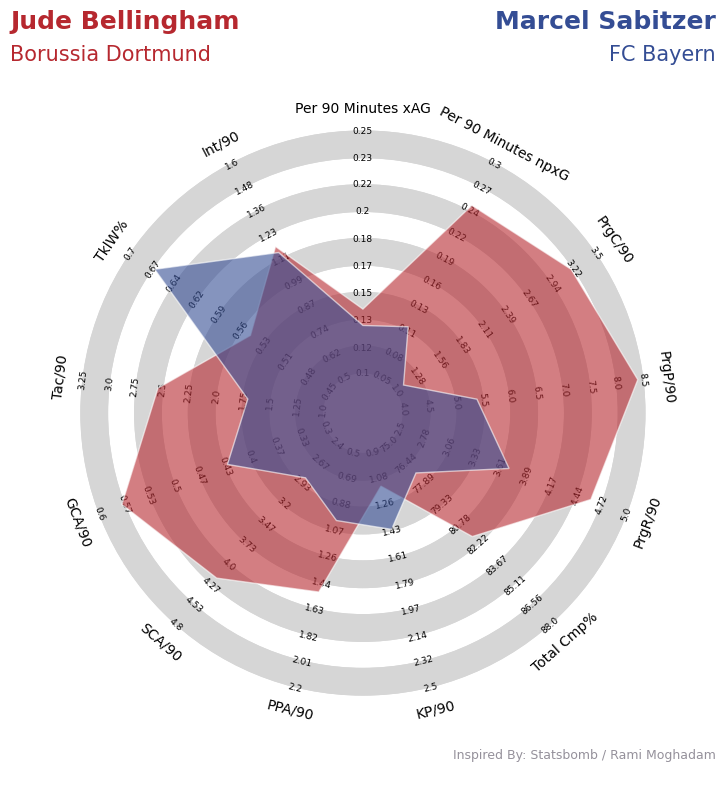

In [41]:
params = df.columns.tolist()

ranges = [(0.10,0.25),(0.05,0.30),(1.0,3.5),(4.0,8.5),(2.5,5.0),(75.0,88.0),(0.90,2.50),(0.50,2.20),(2.40,4.80),(0.30,0.60),(1.0,3.25),(0.45,0.70),(0.5,1.60)]


values = df.iloc[0], df.iloc[4] 

## title
title = dict(
    title_name='Jude Bellingham',
    title_color='#B6282F',
    subtitle_name='Borussia Dortmund',
    subtitle_color='#B6282F',
    title_name_2='Marcel Sabitzer',
    title_color_2='#344D94',
    subtitle_name_2='FC Bayern',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)


radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, compare=True)